In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [33]:
df = pd.read_csv("C:/Program Files/R Files/cleaned_data.csv")
df

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Gender,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3
0,0,0,0,0,1,0,0,Not difficult at all,3,5,...,Male,25,Unemployed / between jobs,Bachelor (or equivalent),Reddit,singleplayer,1,23,5.0,USA
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,...,Male,41,Unemployed / between jobs,Bachelor (or equivalent),Reddit,multiplayer online with strangers,8,16,33.0,USA
2,0,0,0,0,0,0,0,Not difficult at all,2,5,...,Male,28,Employed,Bachelor (or equivalent),Reddit,multiplayer online with online acquaintances...,0,17,11.0,USA
3,2,1,2,2,2,3,2,Very difficult,2,2,...,Male,19,Employed,High school diploma (or equivalent),Reddit,multiplayer online with strangers,14,14,13.0,KOR
4,0,0,0,0,0,1,0,Not difficult at all,3,5,...,Male,24,Employed,Bachelor (or equivalent),Reddit,multiplayer online with real life friends,1,17,13.0,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12076,1,0,0,1,0,1,1,Not difficult at all,6,6,...,Male,22,Student at college / university,Master (or equivalent),Reddit,multiplayer online with strangers,4,28,7.0,FRA
12077,3,3,3,3,2,3,3,Extremely difficult,5,5,...,Female,20,Student at college / university,High school diploma (or equivalent),Reddit,multiplayer online with strangers,20,23,25.0,USA
12078,0,0,0,0,0,0,0,Not difficult at all,6,6,...,Male,19,Student at college / university,High school diploma (or equivalent),Reddit,multiplayer online with real life friends,0,32,10.0,NOR
12079,3,2,1,3,0,1,3,Somewhat difficult,2,6,...,Female,18,Student at school,High school diploma (or equivalent),Reddit,singleplayer,13,16,32.0,CAN


In [34]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [35]:
X = df_encoded.drop(columns=["GAD_T", "SWL_T", "SPIN_T"])
y = df_encoded["GAD_T"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
y_pred = model.predict(X_test[:5])
y_pred = [round(value, 2) for value in y_pred]
print("GAD_T prediction:", y_pred)

GAD_T prediction: [7.76, 2.0, 5.16, 17.4, 0.0]


In [43]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in indices]
sorted_importances = feature_importances[indices]
top_features = list(zip(sorted_features[:10], sorted_importances[:10]))
print("Top 10 most important features:")
for feature, importance in top_features:
    print(f"{feature}: {importance:.4f}")

Top 10 most important features:
GAD2: 0.4147
GAD3: 0.2664
GAD4: 0.1149
GAD6: 0.0531
GAD1: 0.0480
GAD7: 0.0464
GAD5: 0.0425
Hours: 0.0009
streams: 0.0008
Residence_ISO3: 0.0007


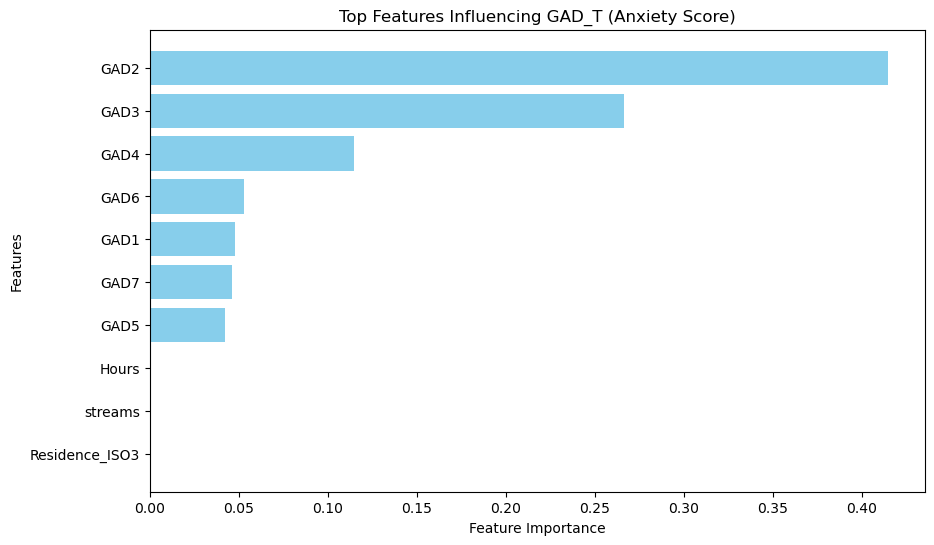

In [44]:
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10], sorted_importances[:10], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top Features Influencing GAD_T (Anxiety Score)")
plt.gca().invert_yaxis()
plt.show()